##Install necessary libraries

In [1]:
%pip install numpy scipy pandas matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install torch torchvision torchaudio


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install numpy pandas scipy matplotlib scikit-learn tensorflow keras pytorch


Defaulting to user installation because normal site-packages is not writeable
  Using cached pytorch-1.0.2.tar.gz (689 bytes)
  ERROR: Command errored out with exit status 1:
   command: /Library/Developer/CommandLineTools/usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/0q/44gwyztj0dlbkt4vjvhbq7v80000gn/T/pip-install-b4uim270/pytorch_85f59da3ad6645d6a4cb6c13bc71b81e/setup.py'"'"'; __file__='"'"'/private/var/folders/0q/44gwyztj0dlbkt4vjvhbq7v80000gn/T/pip-install-b4uim270/pytorch_85f59da3ad6645d6a4cb6c13bc71b81e/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /private/var/folders/0q/44gwyztj0dlbkt4vjvhbq7v80000gn/T/pip-wheel-v_1j1aid
       cwd: /private/var/folders/0q/44gwyztj0dlbkt4vjvhbq7v800

##Load Data

In [8]:
import os
import numpy as np
import pickle

# Corrected path for macOS
dataset_path = "/Users/kostasbekis/Downloads/deap/data_preprocessed_python"

# List all .dat files in the directory
all_files = [os.path.join(dataset_path, file) for file in os.listdir(dataset_path) if file.endswith(".dat")]

# Initialize lists for storing data and labels
all_data = []
all_labels = []

# Read data and labels from each .dat file
for file in all_files:
    with open(file, 'rb') as f:
        file_data = pickle.load(f, encoding='latin1')  # Use 'latin1' for compatibility
        all_data.append(file_data['data'])
        all_labels.append(file_data['labels'])

# Convert lists to numpy arrays for easier processing
all_data = np.concatenate(all_data, axis=0)
all_labels = np.concatenate(all_labels, axis=0)

print("Combined data shape:", all_data.shape)
print("Combined labels shape:", all_labels.shape)


Combined data shape: (1280, 40, 8064)
Combined labels shape: (1280, 4)


In [9]:
np.save('/Users/kostasbekis/Downloads/deap/data_preprocessed_python', all_data)
np.save('/Users/kostasbekis/Downloads/deap/data_preprocessed_python', all_labels)


In [10]:
# Check the dimensions of the data and labels
print("Data shape:", np.array(all_data).shape)
print("Labels shape:", np.array(all_labels).shape)

# Inspect a single trial's data
print("Sample data (first trial):", all_data[0])
print("Sample labels (first trial):", all_labels[0])

# Check the unique values in labels
print("Unique values in labels:", np.unique(all_labels, axis=0))


Data shape: (1280, 40, 8064)
Labels shape: (1280, 4)
Sample data (first trial): [[  41.61858905   33.1385982    -4.10934406 ...   10.88743253
   -12.46669036   -6.80029233]
 [  32.60365733   16.36290704  -24.65479936 ...    9.86679907
   -12.41484003   -6.96407421]
 [  45.35555741   50.36371001   37.57930277 ...    4.41587513
    -7.27659037   -2.09761089]
 ...
 [ -33.41001314  -84.31616907  -40.22250055 ...   98.99599221
    83.18352143   97.05849579]
 [ -45.35823325  -99.54563312  -45.07698377 ...  223.2662704
   210.5475439   226.2975148 ]
 [ -32.15049398  -65.80668179  -30.40049721 ... -765.36788918
  -772.86787532 -765.61788872]]
Sample labels (first trial): [7.03 7.09 8.01 8.01]
Unique values in labels: [[1.   1.   1.   1.  ]
 [1.   1.   2.79 1.  ]
 [1.   1.   2.97 1.  ]
 ...
 [9.   9.   8.1  9.  ]
 [9.   9.   8.96 8.05]
 [9.   9.   9.   9.  ]]


Matplotlib is building the font cache; this may take a moment.


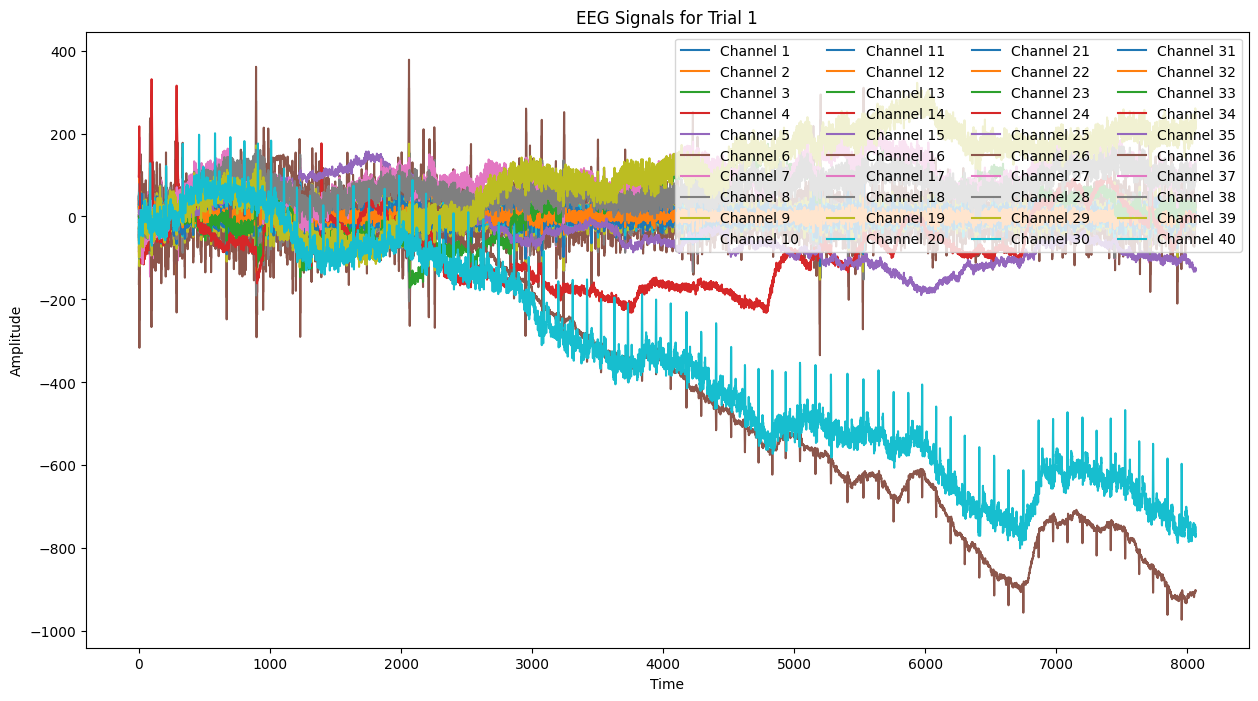

In [11]:
import matplotlib.pyplot as plt

# Choose a sample trial
sample_trial = 0

# Plot all channels in the trial
plt.figure(figsize=(15, 8))
for channel in range(len(all_data[sample_trial])):
    plt.plot(all_data[sample_trial][channel], label=f'Channel {channel+1}')

plt.title("EEG Signals for Trial 1")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend(loc='upper right', ncol=4)
plt.show()


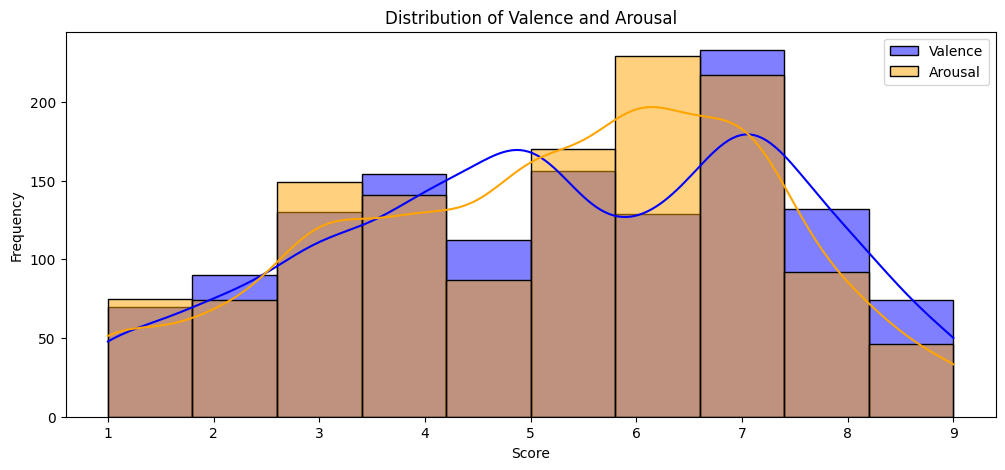

In [12]:
import seaborn as sns

# Separate label dimensions
valence = [label[0] for label in all_labels]
arousal = [label[1] for label in all_labels]

# Plot distributions
plt.figure(figsize=(12, 5))
sns.histplot(valence, kde=True, bins=10, color='blue', label='Valence')
sns.histplot(arousal, kde=True, bins=10, color='orange', label='Arousal')
plt.title("Distribution of Valence and Arousal")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [13]:
# Check for missing values in data
print("Missing values in data:", np.isnan(all_data).sum())

# Check for missing values in labels
print("Missing values in labels:", np.isnan(all_labels).sum())


Missing values in data: 0
Missing values in labels: 0


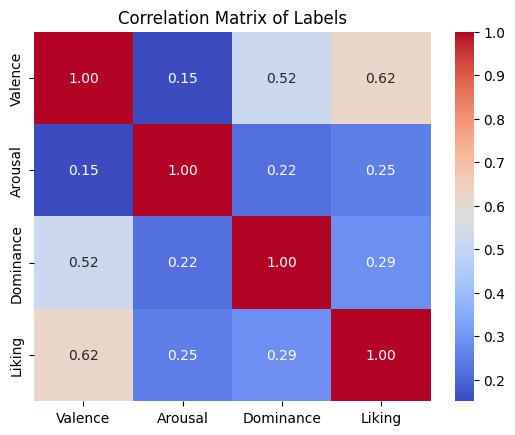

In [14]:
import pandas as pd

# Convert labels to a DataFrame for analysis
labels_df = pd.DataFrame(all_labels, columns=['Valence', 'Arousal', 'Dominance', 'Liking'])

# Correlation matrix
correlation_matrix = labels_df.corr()

# Visualize correlation
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Labels")
plt.show()


In [17]:
print(all_labels)

[[7.03 7.09 8.01 8.01]
 [7.99 8.1  8.06 9.  ]
 [9.   7.04 7.   9.  ]
 ...
 [1.   9.   1.   1.  ]
 [1.   9.   1.   1.01]
 [3.99 8.06 2.09 2.03]]


In [18]:
import os
import pickle

# Update path to match your extracted dataset folder
dataset_path = "/Users/kostasbekis/Downloads/deap/data_preprocessed_python"

# List all files
files = [os.path.join(dataset_path, file) for file in os.listdir(dataset_path) if file.endswith(".dat")]

# Load and inspect one file
with open(files[0], 'rb') as f:
    data = pickle.load(f, encoding='latin1')

# Explore structure
print(data.keys())


dict_keys(['labels', 'data'])


In [19]:
import pickle
import numpy as np
def read_data(filename):
    x = pickle._Unpickler(open(filename, 'rb'))
    x.encoding = 'latin1'
    data = x.load()
    return data

files = []
for n in range(1, 33):
    s = ''
    if n < 10:
        s += '0'
    s += str(n)
    files.append(s)
print(files)

['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32']


In [20]:
labels = []
data = []
for i in files:
    fileph = "/Users/kostasbekis/Downloads/deap/data_preprocessed_python/s" + i + ".dat"
    d = read_data(fileph)
    labels.append(d['labels'])
    data.append(d['data'])
print(labels)
print(data)

[array([[7.71, 7.6 , 6.9 , 7.83],
       [8.1 , 7.31, 7.28, 8.47],
       [8.58, 7.54, 9.  , 7.08],
       [4.94, 6.01, 6.12, 8.06],
       [6.96, 3.92, 7.19, 6.05],
       [8.27, 3.92, 7.  , 8.03],
       [7.44, 3.73, 7.08, 7.04],
       [7.32, 2.55, 6.32, 5.87],
       [4.04, 3.29, 3.62, 5.99],
       [1.99, 4.86, 2.04, 7.09],
       [2.99, 2.36, 3.63, 6.24],
       [2.71, 2.77, 3.4 , 7.35],
       [1.95, 3.12, 2.87, 6.18],
       [4.18, 2.24, 3.04, 5.04],
       [3.17, 8.08, 2.91, 5.04],
       [6.81, 7.44, 8.15, 7.14],
       [2.46, 6.91, 6.77, 6.41],
       [7.23, 7.15, 6.94, 8.01],
       [7.17, 8.  , 8.1 , 6.79],
       [8.26, 7.91, 7.19, 8.13],
       [9.  , 7.95, 8.37, 7.86],
       [7.09, 2.08, 7.06, 7.37],
       [8.15, 3.01, 7.37, 7.9 ],
       [7.04, 7.09, 8.01, 8.22],
       [8.86, 7.21, 8.65, 7.21],
       [7.28, 7.27, 7.41, 8.24],
       [7.35, 6.95, 7.03, 7.29],
       [3.88, 3.35, 4.01, 7.87],
       [1.36, 2.27, 3.  , 8.14],
       [2.08, 2.99, 3.22, 7.33],
       [3

##RNN

In [1]:
import os
import pickle
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout

/Users/kostasbekis/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
import os
import pickle

# Update path to match your extracted dataset folder
dataset_path = "/Users/kostasbekis/Downloads/deap/data_preprocessed_python"

# List all files
files = [os.path.join(dataset_path, file) for file in os.listdir(dataset_path) if file.endswith(".dat")]

# Load and inspect one file
with open(files[0], 'rb') as f:
    data = pickle.load(f, encoding='latin1')

# Explore structure
print(data.keys())


dict_keys(['labels', 'data'])


In [3]:
import pickle
import numpy as np
def read_data(filename):
    x = pickle._Unpickler(open(filename, 'rb'))
    x.encoding = 'latin1'
    data = x.load()
    return data

files = []
for n in range(1, 33):
    s = ''
    if n < 10:
        s += '0'
    s += str(n)
    files.append(s)
print(files)

['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32']


In [4]:
labels = []
data = []
for i in files:
    fileph = "/Users/kostasbekis/Downloads/deap/data_preprocessed_python/s" + i + ".dat"
    d = read_data(fileph)
    labels.append(d['labels'])
    data.append(d['data'])
print(labels)
print(data)

[array([[7.71, 7.6 , 6.9 , 7.83],
       [8.1 , 7.31, 7.28, 8.47],
       [8.58, 7.54, 9.  , 7.08],
       [4.94, 6.01, 6.12, 8.06],
       [6.96, 3.92, 7.19, 6.05],
       [8.27, 3.92, 7.  , 8.03],
       [7.44, 3.73, 7.08, 7.04],
       [7.32, 2.55, 6.32, 5.87],
       [4.04, 3.29, 3.62, 5.99],
       [1.99, 4.86, 2.04, 7.09],
       [2.99, 2.36, 3.63, 6.24],
       [2.71, 2.77, 3.4 , 7.35],
       [1.95, 3.12, 2.87, 6.18],
       [4.18, 2.24, 3.04, 5.04],
       [3.17, 8.08, 2.91, 5.04],
       [6.81, 7.44, 8.15, 7.14],
       [2.46, 6.91, 6.77, 6.41],
       [7.23, 7.15, 6.94, 8.01],
       [7.17, 8.  , 8.1 , 6.79],
       [8.26, 7.91, 7.19, 8.13],
       [9.  , 7.95, 8.37, 7.86],
       [7.09, 2.08, 7.06, 7.37],
       [8.15, 3.01, 7.37, 7.9 ],
       [7.04, 7.09, 8.01, 8.22],
       [8.86, 7.21, 8.65, 7.21],
       [7.28, 7.27, 7.41, 8.24],
       [7.35, 6.95, 7.03, 7.29],
       [3.88, 3.35, 4.01, 7.87],
       [1.36, 2.27, 3.  , 8.14],
       [2.08, 2.99, 3.22, 7.33],
       [3

In [5]:
import numpy as np

# Convert labels and data to NumPy arrays
labels = np.array(labels)
data = np.array(data)

# Reshape the arrays
labels = labels.reshape(1280, 4)
data = data.reshape(1280, 40, 8064)

# Print shapes to confirm
print(labels.shape)  # Should be (1280, 4)
print(data.shape)    # Should be (1280, 40, 8064)

(1280, 4)
(1280, 40, 8064)


In [6]:
# Load EEG data and labels
data = np.array(data)  # Shape: (1280, 40, 8064)
labels = np.array(labels)  # Shape: (1280, 4)

# Use only EEG data (first 32 channels)
eeg_data = data[:, :32, :]
print("EEG Data Shape:", eeg_data.shape)  # Should be (1280, 32, 8064)
print("Labels Shape:", labels.shape)  # Should be (1280, 4)


EEG Data Shape: (1280, 32, 8064)
Labels Shape: (1280, 4)


In [7]:
# Step 3: Normalize EEG Data
def normalize_trials(data):
    scaler = StandardScaler()
    for i in range(data.shape[0]):
        data[i, :, :] = scaler.fit_transform(data[i, :, :].T).T
    return data

eeg_data = normalize_trials(eeg_data)

In [8]:
# Transpose for RNN format
eeg_data = eeg_data.transpose(0, 2, 1)  # New shape: (1280, 8064, 32)
print("RNN Input Shape:", eeg_data.shape)


RNN Input Shape: (1280, 8064, 32)


In [9]:
# Step 5: One-Hot Encode Labels
def one_hot_encode_labels(labels, num_classes=2):
    return np.stack([
        to_categorical((labels[:, i] > 5).astype(int), num_classes=num_classes)
        for i in range(labels.shape[1])
    ], axis=1)

labels_categorical = one_hot_encode_labels(labels, num_classes=2)
print("Categorical Labels Shape:", labels_categorical.shape)  # (1280, 4, 2)

Categorical Labels Shape: (1280, 4, 2)


In [ ]:
# Step 6: Split Data
X_train, X_temp, y_train, y_temp = train_test_split(eeg_data, labels_categorical, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Train Shape: {X_train.shape}, Validation Shape: {X_val.shape}, Test Shape: {X_test.shape}")
print(f"Train Labels Shape: {y_train.shape}")

# Step 7: Build Multi-Label RNN Model
input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))

# Shared LSTM Layers
x = LSTM(64, return_sequences=True)(input_layer)
x = Dropout(0.3)(x)
x = LSTM(64, return_sequences=False)(x)
x = Dropout(0.3)(x)

# Separate Output Layers
output_valence = Dense(2, activation='softmax', name='valence')(x)
output_arousal = Dense(2, activation='softmax', name='arousal')(x)
output_dominance = Dense(2, activation='softmax', name='dominance')(x)
output_liking = Dense(2, activation='softmax', name='liking')(x)

# Define the model with multiple outputs
model_lstm = Model(inputs=input_layer, outputs=[output_valence, output_arousal, output_dominance, output_liking])


Train Shape: (896, 8064, 32), Validation Shape: (192, 8064, 32), Test Shape: (192, 8064, 32)
Train Labels Shape: (896, 4, 2)


In [11]:
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)


y_train shape: (896, 4, 2)
y_val shape: (192, 4, 2)
y_test shape: (192, 4, 2)


In [13]:
from tensorflow.keras import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

In [ ]:
adam = Adam(learning_rate=0.001)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)
lr_schedule = LearningRateScheduler(lambda epoch: 0.001 * np.exp(-epoch / 10.))

model_lstm.compile(
    optimizer='adam',
    loss=['categorical_crossentropy', 'categorical_crossentropy', 'categorical_crossentropy', 'categorical_crossentropy'],
    metrics=[['accuracy'], ['accuracy'], ['accuracy'], ['accuracy']]
)
model_lstm.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 8064, 32)  │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 8064, 64)  │     24,832 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 8064, 64)  │          0 │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ (None, 64)        │     33,024 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 64)        │          0 │ lstm_1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ valence (Dense)     │ (None, 2)         │        130 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ arousal (Dense)     │ (None, 2)         │        130 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dominance (Dense)   │ (None, 2)         │        130 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ liking (Dense)      │ (None, 2)         │        130 │ dropout_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 58,376 (228.03 KB)

 Trainable params: 58,376 (228.03 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Step 8: Train the Model
# Train the model
history = model_lstm.fit(
    X_train,
    [y_train[:, 0, :], y_train[:, 1, :], y_train[:, 2, :], y_train[:, 3, :]],  # Provide separate targets for each output
    validation_data=(
        X_val,
        [y_val[:, 0, :], y_val[:, 1, :], y_val[:, 2, :], y_val[:, 3, :]]
    ),
    epochs=50,
    batch_size=32,
    callbacks=[es, lr_schedule]

)




Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - arousal_accuracy: 0.4962 - arousal_loss: 0.6979 - dominance_accuracy: 0.5265 - dominance_loss: 0.6973 - liking_accuracy: 0.5454 - liking_loss: 0.6881 - loss: 2.7841 - valence_accuracy: 0.4961 - valence_loss: 0.7008 - val_arousal_accuracy: 0.5677 - val_arousal_loss: 0.6787 - val_dominance_accuracy: 0.6250 - val_dominance_loss: 0.6659 - val_liking_accuracy: 0.6302 - val_liking_loss: 0.6607 - val_loss: 2.6999 - val_valence_accuracy: 0.5208 - val_valence_loss: 0.6946 - learning_rate: 0.0010
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - arousal_accuracy: 0.5631 - arousal_loss: 0.6724 - dominance_accuracy: 0.6199 - dominance_loss: 0.6664 - liking_accuracy: 0.6778 - liking_loss: 0.6208 - loss: 2.6359 - valence_accuracy: 0.5917 - valence_loss: 0.6763 - val_arousal_accuracy: 0.5833 - val_arousal_loss: 0.6750 - val_dominance_accuracy: 0.6198 - val_dominance_loss: 0.6634 - val_liking_accuracy: 0.6302 - val_liking_loss: 0.6640 - val_loss: 2

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 182ms/step - arousal_accuracy: 0.5676 - arousal_loss: 1.2711 - dominance_accuracy: 0.5940 - dominance_loss: 1.0824 - liking_accuracy: 0.6018 - liking_loss: 0.9135 - loss: 4.6001 - valence_accuracy: 0.5574 - valence_loss: 1.3331
Valence Loss: 1.2133, Valence Accuracy: 0.58
Arousal Loss: 1.2774, Arousal Accuracy: 0.61
Dominance Loss: 1.0685, Dominance Accuracy: 0.61
Liking Loss: 0.9284, Liking Accuracy: 0.58
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 177ms/step


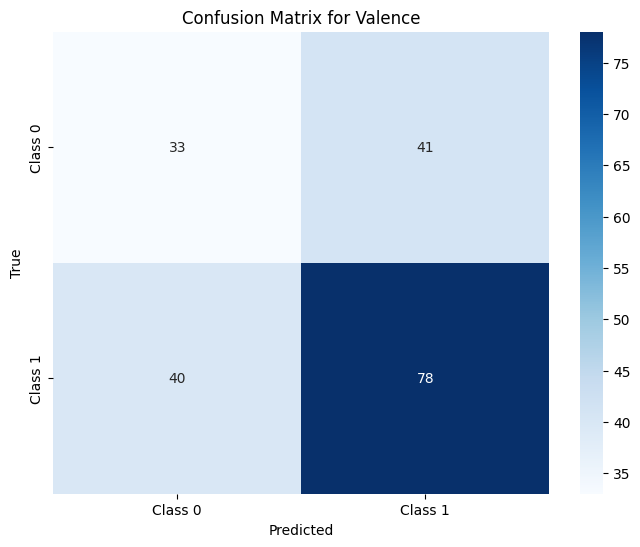

Classification Report for Valence:
              precision    recall  f1-score   support

     Class 0       0.45      0.45      0.45        74
     Class 1       0.66      0.66      0.66       118

    accuracy                           0.58       192
   macro avg       0.55      0.55      0.55       192
weighted avg       0.58      0.58      0.58       192



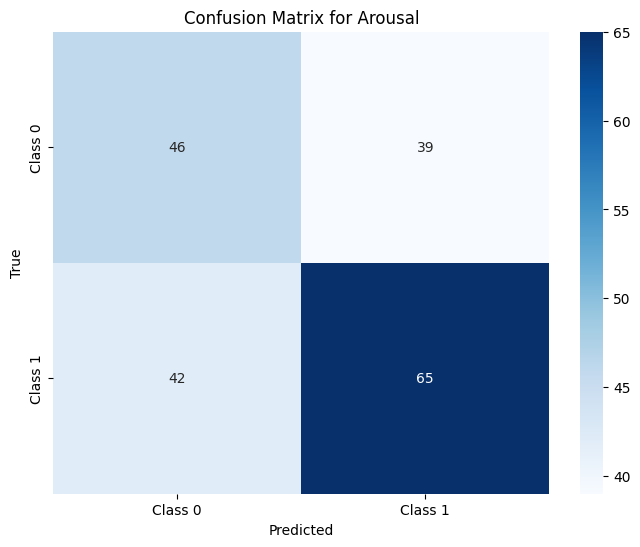

Classification Report for Arousal:
              precision    recall  f1-score   support

     Class 0       0.52      0.54      0.53        85
     Class 1       0.62      0.61      0.62       107

    accuracy                           0.58       192
   macro avg       0.57      0.57      0.57       192
weighted avg       0.58      0.58      0.58       192



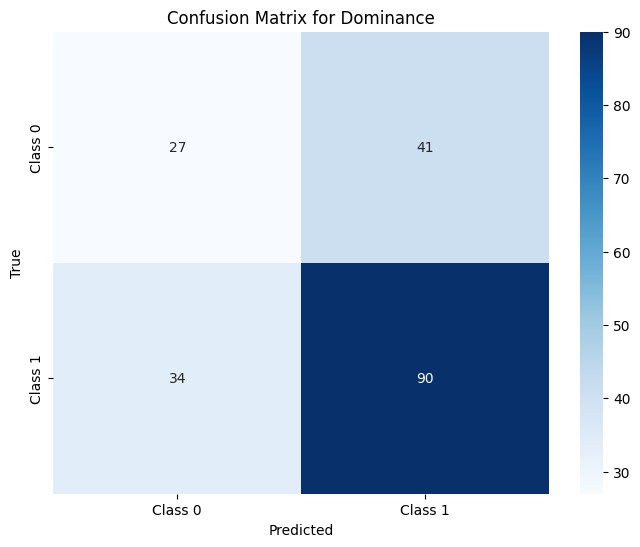

Classification Report for Dominance:
              precision    recall  f1-score   support

     Class 0       0.44      0.40      0.42        68
     Class 1       0.69      0.73      0.71       124

    accuracy                           0.61       192
   macro avg       0.56      0.56      0.56       192
weighted avg       0.60      0.61      0.60       192



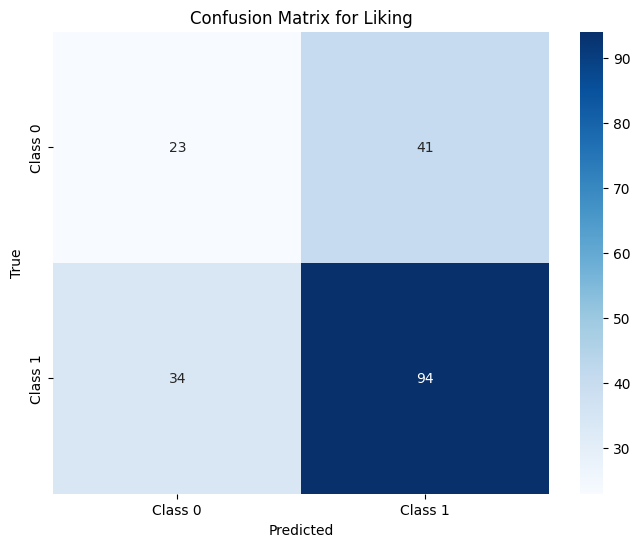

Classification Report for Liking:
              precision    recall  f1-score   support

     Class 0       0.40      0.36      0.38        64
     Class 1       0.70      0.73      0.71       128

    accuracy                           0.61       192
   macro avg       0.55      0.55      0.55       192
weighted avg       0.60      0.61      0.60       192



In [25]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 9: Evaluate the Model
evaluation = model_lstm.evaluate(
    X_test,
    [y_test[:, 0, :], y_test[:, 1, :], y_test[:, 2, :], y_test[:, 3, :]],
    verbose=1
)

# Print evaluation results for each output
print(f"Valence Loss: {evaluation[1]:.4f}, Valence Accuracy: {evaluation[5]:.2f}")
print(f"Arousal Loss: {evaluation[2]:.4f}, Arousal Accuracy: {evaluation[6]:.2f}")
print(f"Dominance Loss: {evaluation[3]:.4f}, Dominance Accuracy: {evaluation[7]:.2f}")
print(f"Liking Loss: {evaluation[4]:.4f}, Liking Accuracy: {evaluation[8]:.2f}")

# Step 10: Generate Predictions
predictions = model_lstm.predict(X_test)
y_pred = [pred.argmax(axis=1) for pred in predictions]  # Convert softmax outputs to class labels
y_true = [y_test[:, i, :].argmax(axis=1) for i in range(4)]

# Step 11: Confusion Matrices
output_names = ['Valence', 'Arousal', 'Dominance', 'Liking']
for i, (true, pred) in enumerate(zip(y_true, y_pred)):
    cm = confusion_matrix(true, pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.title(f'Confusion Matrix for {output_names[i]}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Classification Report
    print(f"Classification Report for {output_names[i]}:")
    print(classification_report(true, pred, target_names=['Class 0', 'Class 1']))


In [63]:
# Save the model
model_lstm.save("emotion_rnn_multiclass_model.h5")

CNN

In [20]:
# Assuming eeg_data has shape (1280, 32, 8064)
# Step 1: Transpose to match (samples, time steps, channels)
eeg_data = eeg_data.transpose(0, 2, 1)  # New shape: (1280, 8064, 32)

# Step 2: Add channel dimension
eeg_data = np.expand_dims(eeg_data, axis=-1)  # New shape: (1280, 8064, 32, 1)

# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(eeg_data, labels_categorical, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Train Shape: {X_train.shape}, Validation Shape: {X_val.shape}, Test Shape: {X_test.shape}")


Train Shape: (896, 32, 8064, 1), Validation Shape: (192, 32, 8064, 1), Test Shape: (192, 32, 8064, 1)


In [22]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Step 1: Ensure Data Shape and Normalization
# Assuming data and labels are preprocessed as follows:
# data: shape (1280, 32, 8064) -> EEG data (trials x channels x time steps)
# labels: shape (1280, 4) -> Valence, Arousal, Dominance, Liking


# Define the input shape
input_layer = Input(shape=(32, 8064, 1))

# Shared CNN layers
x = Conv2D(32, kernel_size=(3, 3), activation='relu')(input_layer)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.3)(x)

x = Conv2D(64, kernel_size=(3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.3)(x)

x = Flatten()(x)
shared_features = Dense(128, activation='relu')(x)
shared_features = Dropout(0.3)(shared_features)

# Separate output layers for each label
output_valence = Dense(2, activation='softmax', name='valence')(shared_features)
output_arousal = Dense(2, activation='softmax', name='arousal')(shared_features)
output_dominance = Dense(2, activation='softmax', name='dominance')(shared_features)
output_liking = Dense(2, activation='softmax', name='liking')(shared_features)

# Define the model
model_cnn = Model(inputs=input_layer, outputs=[output_valence, output_arousal, output_dominance, output_liking])

# Compile the model with separate loss and metrics for each output
model_cnn.compile(
    optimizer='adam',
    loss=['categorical_crossentropy', 'categorical_crossentropy', 'categorical_crossentropy', 'categorical_crossentropy'],
    metrics=[['accuracy'], ['accuracy'], ['accuracy'], ['accuracy']]
)

model_cnn.summary()

# Train the model
history = model_cnn.fit(
    X_train,
    [y_train[:, 0, :], y_train[:, 1, :], y_train[:, 2, :], y_train[:, 3, :]],
    validation_data=(
        X_val,
        [y_val[:, 0, :], y_val[:, 1, :], y_val[:, 2, :], y_val[:, 3, :]]
    ),
    epochs=20,
    batch_size=32
)


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 32, 8064,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 30, 8062,  │        320 │ input_layer_5[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_8     │ (None, 15, 4031,  │          0 │ conv2d_8[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_14          │ (None, 15, 4031,  │          0 │ max_pooling2d_8[… │
│ (Dropout)           │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 13, 4029,  │     18,496 │ dropout_14[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_9     │ (None, 6, 2014,   │          0 │ conv2d_9[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_15          │ (None, 6, 2014,   │          0 │ max_pooling2d_9[… │
│ (Dropout)           │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_4 (Flatten) │ (None, 773376)    │          0 │ dropout_15[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 128)       │ 98,992,256 │ flatten_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_16          │ (None, 128)       │          0 │ dense_5[0][0]     │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ valence (Dense)     │ (None, 2)         │        258 │ dropout_16[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ arousal (Dense)     │ (None, 2)         │        258 │ dropout_16[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dominance (Dense)   │ (None, 2)         │        258 │ dropout_16[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ liking (Dense)      │ (None, 2)         │        258 │ dropout_16[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 99,012,104 (377.70 MB)

 Trainable params: 99,012,104 (377.70 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 27s 915ms/step - arousal_accuracy: 0.4963 - arousal_loss: 16.7853 - dominance_accuracy: 0.4610 - dominance_loss: 10.7414 - liking_accuracy: 0.5419 - liking_loss: 22.5528 - loss: 66.4993 - valence_accuracy: 0.5231 - valence_loss: 16.4198 - val_arousal_accuracy: 0.5833 - val_arousal_loss: 0.6917 - val_dominance_accuracy: 0.6250 - val_dominance_loss: 0.6910 - val_liking_accuracy: 0.6302 - val_liking_loss: 0.6923 - val_loss: 2.7683 - val_valence_accuracy: 0.4948 - val_valence_loss: 0.6933
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 25s 897ms/step - arousal_accuracy: 0.6066 - arousal_loss: 0.6899 - dominance_accuracy: 0.6441 - dominance_loss: 0.6874 - liking_accuracy: 0.6567 - liking_loss: 0.6847 - loss: 2.7520 - valence_accuracy: 0.5557 - valence_loss: 0.6899 - val_arousal_accuracy: 0.5833 - val_arousal_loss: 0.6900 - val_dominance_accuracy: 0.6250 - val_dominance_loss: 0.6877 - val_liking_accuracy: 0.6302 - val_liking_loss: 0.6871 - val_loss: 2.7583 - val_v

ValueError: too many values to unpack (expected 5)

In [ ]:
# Evaluate the model
evaluation_results = model_cnn.evaluate(
    X_test,
    [y_test[:, 0, :], y_test[:, 1, :], y_test[:, 2, :], y_test[:, 3, :]]
)

# Unpack the evaluation results based on their order
total_loss = evaluation_results[0]  # Total loss
valence_loss, arousal_loss, dominance_loss, liking_loss = evaluation_results[1:5]  # Individual losses
valence_acc, arousal_acc, dominance_acc, liking_acc = evaluation_results[5:]  # Individual accuracies

print(f"Total Loss: {total_loss:.4f}")
print(f"Valence Loss: {valence_loss:.4f}, Valence Accuracy: {valence_acc:.2f}")
print(f"Arousal Loss: {arousal_loss:.4f}, Arousal Accuracy: {arousal_acc:.2f}")
print(f"Dominance Loss: {dominance_loss:.4f}, Dominance Accuracy: {dominance_acc:.2f}")
print(f"Liking Loss: {liking_loss:.4f}, Liking Accuracy: {liking_acc:.2f}")


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 176ms/step - arousal_accuracy: 0.5676 - arousal_loss: 1.2711 - dominance_accuracy: 0.5940 - dominance_loss: 1.0824 - liking_accuracy: 0.6018 - liking_loss: 0.9135 - loss: 4.6001 - valence_accuracy: 0.5574 - valence_loss: 1.3331
Total Loss: 4.4875
Valence Loss: 1.2133, Valence Accuracy: 0.58
Arousal Loss: 1.2774, Arousal Accuracy: 0.61
Dominance Loss: 1.0685, Dominance Accuracy: 0.61
Liking Loss: 0.9284, Liking Accuracy: 0.58
